In [1]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


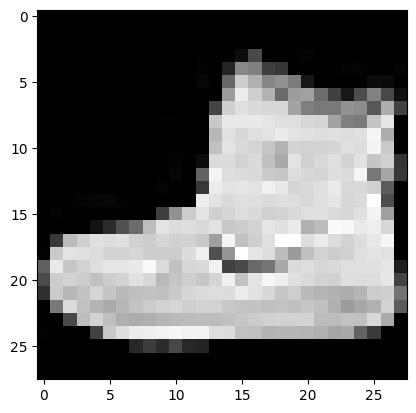

In [4]:
plt.imshow(train_images[0], cmap = 'gray')
plt.show()


In [5]:
print(train_labels[0])

9


In [6]:
train_images, test_images = train_images/255.0, test_images/255.0

In [7]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs = 5, validation_data = [test_images, test_labels])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 31ms/step - accuracy: 0.7686 - loss: 0.6422 - val_accuracy: 0.8715 - val_loss: 0.3583
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.8812 - loss: 0.3305 - val_accuracy: 0.8865 - val_loss: 0.3112
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.8983 - loss: 0.2776 - val_accuracy: 0.8933 - val_loss: 0.2916
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9109 - loss: 0.2412 - val_accuracy: 0.8963 - val_loss: 0.2854
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9212 - loss: 0.2147 - val_accuracy: 0.8992 - val_loss: 0.2887


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest Accuracy:', test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.8992 - loss: 0.2887

Test Accuracy: 0.8992000222206116


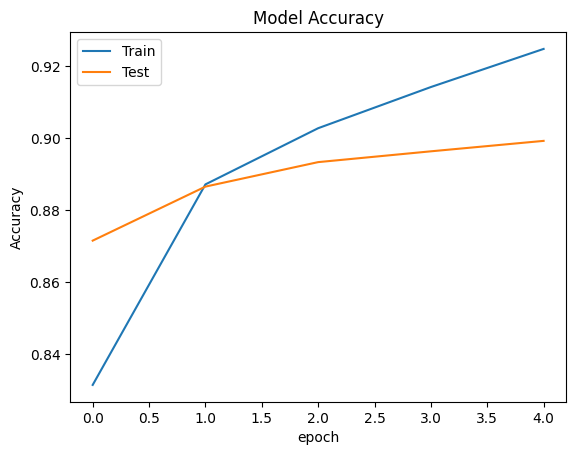

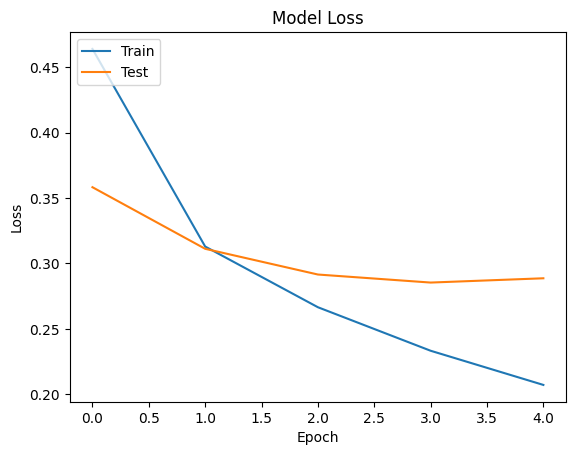

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc = 'upper left')


In [13]:
model.save('trained_fashion_mnist_model.h5')